In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn import preprocessing
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

In [ ]:
# Clustering hospital summary

In [11]:
sept2015 = pd.read_csv('summary_2015.csv')
sept2016 = pd.read_csv('summary_2016.csv')
sept2017 = pd.read_csv('summary_2017.csv')

In [12]:
sept = pd.concat([sept2015,sept2016,sept2017])

C:\Users\Earl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
sept.head()

,Number of Beds,System,apr_drg_code,apr_severity_of_illness,apr_severity_of_illness_description,area_sqmi,facility_name,mean_length_of_stay,mean_total_charges_day,patients,payment_typology_1
0,912,Health+,720,NaN,Major,0.77,Bellevue Hospital Center,8.000000,7017.275000,2,Blue Cross/Blue Shield
1,912,Health+,720,NaN,Moderate,0.77,Bellevue Hospital Center,5.666667,6852.591667,6,Blue Cross/Blue Shield
2,912,Health+,720,NaN,Extreme,0.77,Bellevue Hospital Center,14.228571,7124.722571,70,Medicare
3,912,Health+,720,NaN,Major,0.77,Bellevue Hospital Center,8.659341,6399.484835,91,Medicare
4,912,Health+,720,NaN,Minor,0.77,Bellevue Hospital Center,5.000000,6386.240000,4,Medicare


In [84]:
sept

,Number of Beds,System,apr_drg_code,apr_severity_of_illness,apr_severity_of_illness_description,area_sqmi,facility_name,mean_length_of_stay,mean_total_charges_day,patients,payment_typology_1
0,912,Health+,720,NaN,Major,0.770,Bellevue Hospital Center,8.000000,7017.275000,2,Blue Cross/Blue Shield
1,912,Health+,720,NaN,Moderate,0.770,Bellevue Hospital Center,5.666667,6852.591667,6,Blue Cross/Blue Shield
2,912,Health+,720,NaN,Extreme,0.770,Bellevue Hospital Center,14.228571,7124.722571,70,Medicare
3,912,Health+,720,NaN,Major,0.770,Bellevue Hospital Center,8.659341,6399.484835,91,Medicare
4,912,Health+,720,NaN,Minor,0.770,Bellevue Hospital Center,5.000000,6386.240000,4,Medicare
5,912,Health+,720,NaN,Moderate,0.770,Bellevue Hospital Center,6.540000,6316.883200,50,Medicare
6,912,Health+,720,NaN,Extreme,0.770,Bellevue Hospital Center,12.250000,6490.560000,4,Private Health Insurance
7,912,Health+,720,NaN,Major,0.770,Bellevue Hospital Center,5.750000,7022.595000,4,Private Health Insurance
8,912,Health+,720,NaN,Minor,0.770,Bellevue Hospital Center,7.000000,6437.370000,2,Private Health Insurance
9,912,Health+,720,NaN,Moderate,0.770,Bellevue Hospital Center,4.250000,7000.660000,4,Private Health Insurance


In [77]:
# severity = pd.get_dummies(sept['apr_severity_of_illness_description'])
# system = pd.get_dummies(sept['System'])
# payment = pd.get_dummies(sept['payment_typology_1'])

In [86]:
sept['apr_severity_of_illness_description'].fillna(sept['apr_severity_of_illness'], inplace=True)

In [96]:
severity = sept['apr_severity_of_illness_description'].astype('category').cat.codes

In [91]:
system = sept['System'].astype('category').cat.codes

In [92]:
payment = sept['payment_typology_1'].astype('category').cat.codes

In [225]:
facility = sept['facility_name'].astype('category').cat.codes

In [228]:
df = pd.concat([sept, severity, system, payment, facility], axis=1)

In [229]:
df = df.rename(columns={0:'severity', 1:'system', 2:'payment', 3:'hospital'})

In [230]:
df.head()

,Number of Beds,System,apr_drg_code,apr_severity_of_illness,apr_severity_of_illness_description,area_sqmi,facility_name,mean_length_of_stay,mean_total_charges_day,patients,payment_typology_1,severity,system,payment,hospital
0,912,Health+,720,NaN,Major,0.77,Bellevue Hospital Center,8.000000,7017.275000,2,Blue Cross/Blue Shield,1,0,0,0
1,912,Health+,720,NaN,Moderate,0.77,Bellevue Hospital Center,5.666667,6852.591667,6,Blue Cross/Blue Shield,3,0,0,0
2,912,Health+,720,NaN,Extreme,0.77,Bellevue Hospital Center,14.228571,7124.722571,70,Medicare,0,0,1,0
3,912,Health+,720,NaN,Major,0.77,Bellevue Hospital Center,8.659341,6399.484835,91,Medicare,1,0,1,0
4,912,Health+,720,NaN,Minor,0.77,Bellevue Hospital Center,5.000000,6386.240000,4,Medicare,2,0,1,0


In [231]:
df.columns

Index(['Number of Beds', 'System', 'apr_drg_code', 'apr_severity_of_illness',
       'apr_severity_of_illness_description', 'area_sqmi', 'facility_name',
       'mean_length_of_stay', 'mean_total_charges_day', 'patients',
       'payment_typology_1', 'severity', 'system', 'payment', 'hospital'],
      dtype='object')

In [417]:
list(enumerate(df['facility_name'].astype('category').cat.categories))

[(0, 'Bellevue Hospital Center'),
 (1, 'Bronx-Lebanon Hospital Center - Concourse Division'),
 (2, 'Brookdale Hospital Medical Center'),
 (3, 'Brooklyn Hospital Center - Downtown Campus'),
 (4, 'Calvary Hospital Inc'),
 (5, 'Coney Island Hospital'),
 (6, 'Elmhurst Hospital Center'),
 (7, 'Flushing Hospital Medical Center'),
 (8, 'Harlem Hospital Center'),
 (9, 'Henry J. Carter Specialty Hospital'),
 (10, 'Interfaith Medical Center'),
 (11, 'Jacobi Medical Center'),
 (12, 'Jamaica Hospital Medical Center'),
 (13, 'Kings County Hospital Center'),
 (14, 'Kingsbrook Jewish Medical Center'),
 (15, 'Lenox Hill Hospital'),
 (16, 'Lincoln Medical & Mental Health Center'),
 (17, 'Long Island Jewish Forest Hills'),
 (18, 'Long Island Jewish Medical Center'),
 (19, 'Maimonides Medical Center'),
 (20, 'Memorial Hospital for Cancer and Allied Diseases'),
 (21, 'Metropolitan Hospital Center'),
 (22, 'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div'),
 (23, 'Montefiore Medical Ce

In [232]:
var_list =['Number of Beds',
          'area_sqmi',
          'mean_length_of_stay',
          'mean_total_charges_day',
          'patients',
          'severity',
          'system',
          'payment',
          'hospital']

In [283]:
X = df[var_list]

In [247]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.88585736, -0.90283744,  0.16281059, ..., -1.16504711,
        -1.33770204, -1.69359119],
       [ 1.88585736, -0.90283744, -0.25294872, ..., -1.16504711,
        -1.33770204, -1.69359119],
       [ 1.88585736, -0.90283744,  1.27263339, ..., -1.16504711,
        -0.39601224, -1.69359119],
       ...,
       [-0.6310457 ,  0.41489889, -0.90628477, ...,  1.32951867,
         0.54567756,  1.68966629],
       [-0.6310457 ,  0.41489889, -0.53012159, ...,  1.32951867,
         0.54567756,  1.68966629],
       [-0.6310457 ,  0.41489889, -0.90628477, ...,  1.32951867,
         1.48736736,  1.68966629]])

In [235]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [254]:
# Add cluster number to the original data
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
#X_scaled['hospital_name'] = sept['facility_name']

X_scaled.head()

,Number of Beds,area_sqmi,mean_length_of_stay,mean_total_charges_day,patients,severity,system,payment,hospital
0,1.885857,-0.902837,0.162811,-0.511051,-0.441399,-0.418705,-1.165047,-1.337702,-1.693591
1,1.885857,-0.902837,-0.252949,-0.550330,-0.391154,1.324889,-1.165047,-1.337702,-1.693591
2,1.885857,-0.902837,1.272633,-0.485424,0.412779,-1.290503,-1.165047,-0.396012,-1.693591
3,1.885857,-0.902837,0.280294,-0.658400,0.676570,-0.418705,-1.165047,-0.396012,-1.693591
4,1.885857,-0.902837,-0.371737,-0.661559,-0.416277,0.453092,-1.165047,-0.396012,-1.693591


In [255]:
X_kmeans = X_scaled[var_list]

In [256]:
range_n_clusters = range(2,10)
sil = []

for n_clusters in range_n_clusters:
    km = KMeans(random_state = 100, n_clusters = n_clusters)
    res = km.fit_predict(X_kmeans)
    silhouette_avg = silhouette_score(X_kmeans, res)
    sil.append(silhouette_avg)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.13810407216726672
For n_clusters = 3, the average silhouette_score is : 0.12306318059482062
For n_clusters = 4, the average silhouette_score is : 0.14231436901408265
For n_clusters = 5, the average silhouette_score is : 0.17239712621790307
For n_clusters = 6, the average silhouette_score is : 0.15864722826140612
For n_clusters = 7, the average silhouette_score is : 0.16487975300276658
For n_clusters = 8, the average silhouette_score is : 0.16907495764616948
For n_clusters = 9, the average silhouette_score is : 0.163416635122614


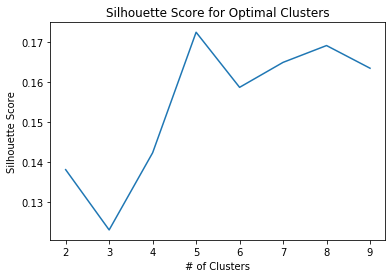

In [257]:
plt.plot(range_n_clusters, sil)
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

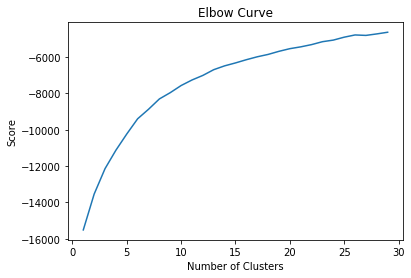

In [258]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 30
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_kmeans).score(X_kmeans) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [259]:
km = KMeans(random_state=234, n_clusters = 5)
res = km.fit(X_kmeans)

In [260]:
from collections import Counter, defaultdict
print(Counter(res.labels_))

Counter({3: 559, 1: 407, 4: 407, 0: 255, 2: 96})


In [261]:
X_scaled["cluster"] = res.labels_

In [262]:
df["cluster"] = res.labels_

In [263]:
import seaborn as sns
palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
#     for i in range(num_clusters):    
#         plt.subplot(num_clusters, 1, i+1)
#         for j,c in enumerate(cluster_points): 
#             if i!= j:
#                 pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.5)])
    pc = parallel_coordinates(cluster_points[0], 'cluster', color=[addAlpha(palette[0],0.5)])
    pc = parallel_coordinates(cluster_points[1], 'cluster', color=[addAlpha(palette[1],0.5)])
    pc = parallel_coordinates(cluster_points[2], 'cluster', color=[addAlpha(palette[2],0.5)])
    pc = parallel_coordinates(cluster_points[3], 'cluster', color=[addAlpha(palette[3],0.5)])
    pc = parallel_coordinates(cluster_points[4], 'cluster', color=[addAlpha(palette[4],0.5)])
#     pc = parallel_coordinates(cluster_points[5], 'cluster', color=[addAlpha(palette[5],0.5)])
#     pc = parallel_coordinates(cluster_points[6], 'cluster', color=[addAlpha(palette[6],0.5)])

# Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

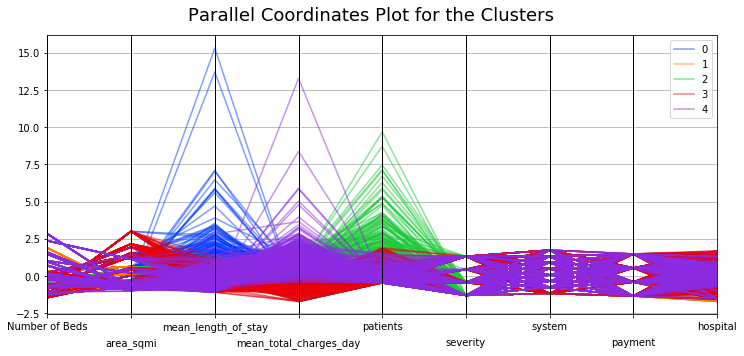

In [264]:
cluster_attributes = ['Number of Beds',
          'area_sqmi',
          'mean_length_of_stay',
          'mean_total_charges_day',
          'patients',
          'severity',
          'system',
          'payment',
          'hospital',
          'cluster']
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled[cluster_attributes], 5)

In [193]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20) 

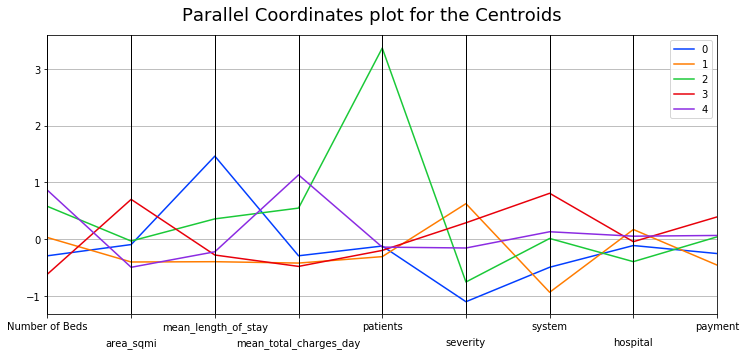

In [265]:
attributes_1 = ['Number of Beds',
          'area_sqmi',
          'mean_length_of_stay',
          'mean_total_charges_day',
          'patients',
          'severity',
          'system',
          'hospital',
          'payment']
centroids = pd.DataFrame(km.cluster_centers_, columns = X_scaled[attributes_1].columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 7)

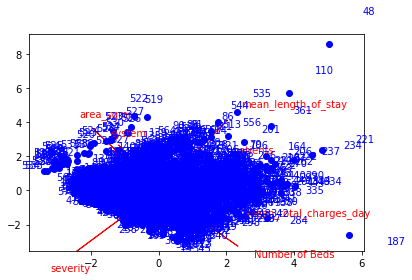

In [266]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components = 2)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

dat = X_scaled[attributes_1]
pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]

## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(dat.index)[i], color='b')

plt.show()

In [268]:
# Scaled Gaussian mixture models

from sklearn.mixture import GaussianMixture

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components = n_clusters, random_state = 100)
    res = gmm.fit_predict(X_scaled[var_list])
    silhouette_avg = silhouette_score(X_scaled[var_list], res)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.05818871496199499
For n_clusters = 3, the average silhouette_score is : 0.070452284495084
For n_clusters = 4, the average silhouette_score is : 0.05206711651054036
For n_clusters = 5, the average silhouette_score is : 0.05397824770068897
For n_clusters = 6, the average silhouette_score is : 0.05945145079359464
For n_clusters = 7, the average silhouette_score is : 0.04457753445470443
For n_clusters = 8, the average silhouette_score is : 0.06888420292287194
For n_clusters = 9, the average silhouette_score is : 0.04370196403235283


In [269]:
# Unscaled Gaussian mixture models

from sklearn.mixture import GaussianMixture

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components = n_clusters, random_state = 100)
    res = gmm.fit_predict(X[var_list])
    silhouette_avg = silhouette_score(X[var_list], res)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.0959755450457266
For n_clusters = 3, the average silhouette_score is : -0.012562173243408543
For n_clusters = 4, the average silhouette_score is : -0.011386256486551031
For n_clusters = 5, the average silhouette_score is : -0.14038947307007477
For n_clusters = 6, the average silhouette_score is : -0.1243451521930132
For n_clusters = 7, the average silhouette_score is : -0.18162893730831361
For n_clusters = 8, the average silhouette_score is : -0.09235478758131903
For n_clusters = 9, the average silhouette_score is : -0.15079398585994164


In [270]:
X[var_list].corr()

,Number of Beds,area_sqmi,mean_length_of_stay,mean_total_charges_day,patients,severity,system,payment,hospital
Number of Beds,1.000000,-0.202828,-0.033305,0.263765,0.181902,0.001238,-0.125800,0.032496,-0.217734
area_sqmi,-0.202828,1.000000,-0.001262,-0.221408,0.032581,0.010858,0.237002,-0.014321,0.125988
mean_length_of_stay,-0.033305,-0.001262,1.000000,-0.077959,0.105472,-0.480258,-0.047700,-0.051408,-0.101401
mean_total_charges_day,0.263765,-0.221408,-0.077959,1.000000,0.114197,-0.227832,0.040933,0.024556,0.128648
patients,0.181902,0.032581,0.105472,0.114197,1.000000,-0.181431,0.031764,-0.149831,0.012306
severity,0.001238,0.010858,-0.480258,-0.227832,-0.181431,1.000000,0.001214,0.004190,0.023931
system,-0.125800,0.237002,-0.047700,0.040933,0.031764,0.001214,1.000000,-0.045101,0.101864
payment,0.032496,-0.014321,-0.051408,0.024556,-0.149831,0.004190,-0.045101,1.000000,-0.036617
hospital,-0.217734,0.125988,-0.101401,0.128648,0.012306,0.023931,0.101864,-0.036617,1.000000


In [272]:
X_scaled[var_list].corr()

,Number of Beds,area_sqmi,mean_length_of_stay,mean_total_charges_day,patients,severity,system,payment,hospital
Number of Beds,1.000000,-0.202828,-0.033305,0.263765,0.181902,0.001238,-0.125800,0.032496,-0.217734
area_sqmi,-0.202828,1.000000,-0.001262,-0.221408,0.032581,0.010858,0.237002,-0.014321,0.125988
mean_length_of_stay,-0.033305,-0.001262,1.000000,-0.077959,0.105472,-0.480258,-0.047700,-0.051408,-0.101401
mean_total_charges_day,0.263765,-0.221408,-0.077959,1.000000,0.114197,-0.227832,0.040933,0.024556,0.128648
patients,0.181902,0.032581,0.105472,0.114197,1.000000,-0.181431,0.031764,-0.149831,0.012306
severity,0.001238,0.010858,-0.480258,-0.227832,-0.181431,1.000000,0.001214,0.004190,0.023931
system,-0.125800,0.237002,-0.047700,0.040933,0.031764,0.001214,1.000000,-0.045101,0.101864
payment,0.032496,-0.014321,-0.051408,0.024556,-0.149831,0.004190,-0.045101,1.000000,-0.036617
hospital,-0.217734,0.125988,-0.101401,0.128648,0.012306,0.023931,0.101864,-0.036617,1.000000


In [273]:
# With PCA

In [274]:
X_scaled_pca = X_scaled[var_list]

In [275]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 9

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled_pca)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [276]:
pca.explained_variance_ratio_

array([0.18845054, 0.16663103, 0.14149699, 0.1209317 , 0.10821218,
       0.09242006, 0.07289552, 0.06414235, 0.04481964])

In [277]:
pca.explained_variance_ratio_.cumsum()

array([0.18845054, 0.35508157, 0.49657856, 0.61751025, 0.72572243,
       0.81814249, 0.89103801, 0.95518036, 1.        ])

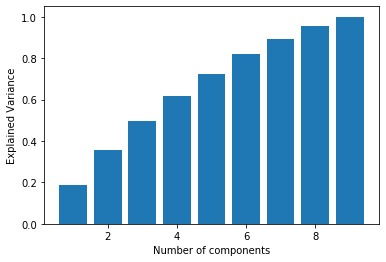

In [278]:
#plot explained variance over the number of compinents
n = 9
plt.bar(np.arange(n)+1, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

## Decision Tree

In [381]:
labels = ['low', 'medium', 'high']

X['price_category'] = pd.qcut((X['mean_total_charges_day']),3, labels=labels)

C:\Users\Earl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [395]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

var_list_1 =['Number of Beds',
             'area_sqmi',
             'mean_length_of_stay',
             'patients',
             'severity',
             'system',
             'payment',
             'hospital']

x = X[var_list_1]
y = X['price_category']

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=999)

In [396]:
max_depth_list = list(range(1,21))
accuracy_test = []

for i in max_depth_list:
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    accuracy_test.append(dt.score(X_test, y_test))
    print("for max_depth = {}:".format(i), accuracy_test[i-1])

for max_depth = 1: 0.49034749034749037
for max_depth = 2: 0.5868725868725869
for max_depth = 3: 0.6428571428571429
for max_depth = 4: 0.6718146718146718
for max_depth = 5: 0.6776061776061776
for max_depth = 6: 0.7084942084942085
for max_depth = 7: 0.7355212355212355
for max_depth = 8: 0.7239382239382239
for max_depth = 9: 0.7027027027027027
for max_depth = 10: 0.7104247104247104
for max_depth = 11: 0.7065637065637066
for max_depth = 12: 0.7104247104247104
for max_depth = 13: 0.7046332046332047
for max_depth = 14: 0.7046332046332047
for max_depth = 15: 0.7123552123552124
for max_depth = 16: 0.7084942084942085
for max_depth = 17: 0.696911196911197
for max_depth = 18: 0.693050193050193
for max_depth = 19: 0.7065637065637066
for max_depth = 20: 0.693050193050193


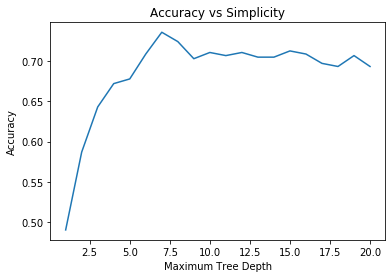

In [397]:
import matplotlib.pylab as plt

# your code here
plt.plot(max_depth_list, accuracy_test)
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Simplicity')
plt.show()

In [398]:
from sklearn.model_selection import GridSearchCV

# your code here
dt = DecisionTreeClassifier(random_state = 999)
param_grid = {'max_depth':range(1,20)}
gr = GridSearchCV(dt, param_grid = param_grid, scoring='accuracy')
rs = gr.fit(X_train,y_train)

print(rs.best_params_)
print(rs.score(X_test,y_test))

C:\Users\Earl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 9}
0.7046332046332047


In [399]:
from sklearn import tree

# your code here
dt = DecisionTreeClassifier(max_depth = 2, random_state = 999)
dt.fit(X_train, y_train)
thestring = tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="hospital <= 13.5, samples = 1206, value = [409, 393, 404], class = high", fillcolor="#fffefe"] ;
1 [label="severity <= 0.5, samples = 345, value = [23, 214, 108], class = low", fillcolor="#a6f3c7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 92, value = [13, 33, 46], class = medium", fillcolor="#e3d3f9"] ;
1 -> 2 ;
3 [label="samples = 253, value = [10, 181, 62], class = low", fillcolor="#84efb0"] ;
1 -> 3 ;
4 [label="hospital <= 37.5, samples = 861, value = [386, 179, 296], class = high", fillcolor="#fbebdf"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 594, value = [367, 74, 153], class = high", fillcolor="#f2c29f"] ;
4 -> 5 ;
6 [label="samples = 267, value = [19, 105, 143], class = medium", fillcolor="#e1d1f9"] ;
4 -> 6 ;
}


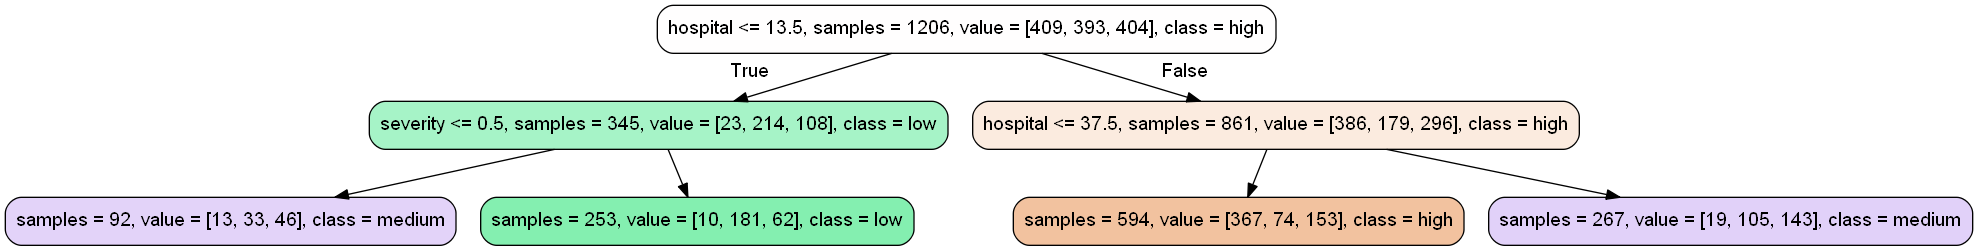

In [420]:
from IPython.display import Image  
import pydotplus
import os     
from sklearn import tree

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dt = DecisionTreeClassifier(max_depth=10, random_state = 999) # just to keep it simple for visualization
dt.fit(X_train,y_train)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

## Random Forest

In [401]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10, random_state = 50)
rf_pred = rf.fit(X_train, y_train)
pred = rf_pred.score(X_test,y_test)
print(pred)

0.693050193050193


In [402]:
# hyperparameter tuning

rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10, random_state = 50)

# alternatively, rf can be written as
# rf = RandomForestClassifier(n_estimators=100)

param_grid = {'max_leaf_nodes':range(2,20)}
gr_rf = GridSearchCV(rf, param_grid = param_grid, scoring='accuracy')
rs_rf = gr_rf.fit(X_train,y_train)

print(rs_rf.best_params_)
print(rs_rf.score(X_test,y_test))

C:\Users\Earl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 19}
0.7316602316602316


In [403]:
rf_pred.feature_importances_

array([0.15258554, 0.32150553, 0.03706097, 0.04290686, 0.039     ,
       0.17817363, 0.00134627, 0.22742121])

In [ ]:
var_list_1 =['Number of Beds',
             'area_sqmi',
             'mean_length_of_stay',
             'patients',
             'severity',
             'system',
             'payment',
             'hospital']

## Multivariate Regression

In [308]:
severity = pd.get_dummies(sept['apr_severity_of_illness_description'])
system = pd.get_dummies(sept['System'])
payment = pd.get_dummies(sept['payment_typology_1'])
hospital_facility = pd.get_dummies(sept['facility_name'])

In [309]:
df_reg = pd.concat([sept, severity, system, payment, hospital_facility], axis=1)

In [311]:
df_reg.shape

(1724, 75)

In [314]:
column_list = list(df_reg.columns)

In [319]:
reg_var = ['Number of Beds',
 'area_sqmi',
 'mean_length_of_stay',
 'patients',
 'Mount Sinai',
 'NYU Langone',
 'NewYork-Presbyterian',
 'Northwell',
 'Others',
 'SUNY',
 'Blue Cross/Blue Shield',
 'Medicare',
 'Private Health Insurance',
 'Self-Pay',
 'Bellevue Hospital Center',
 'Bronx-Lebanon Hospital Center - Concourse Division',
 'Brookdale Hospital Medical Center',
 'Brooklyn Hospital Center - Downtown Campus',
 'Calvary Hospital Inc',
 'Coney Island Hospital',
 'Elmhurst Hospital Center',
 'Flushing Hospital Medical Center',
 'Harlem Hospital Center',
 'Henry J. Carter Specialty Hospital',
 'Interfaith Medical Center',
 'Jacobi Medical Center',
 'Jamaica Hospital Medical Center',
 'Kings County Hospital Center',
 'Kingsbrook Jewish Medical Center',
 'Lenox Hill Hospital',
 'Lincoln Medical & Mental Health Center',
 'Long Island Jewish Forest Hills',
 'Long Island Jewish Medical Center',
 'Maimonides Medical Center',
 'Memorial Hospital for Cancer and Allied Diseases',
 'Metropolitan Hospital Center',
 'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div',
 'Montefiore Medical Center - Henry & Lucy Moses Div',
 'Montefiore Medical Center-Wakefield Hospital',
 'Mount Sinai Beth Israel',
 'Mount Sinai Brooklyn',
 'Mount Sinai Hospital',
 'Mount Sinai Hospital - Mount Sinai Hospital of Queens',
 "Mount Sinai St. Luke's",
 'Mount Sinai West',
 'NYU Hospitals Center',
 'NYU Langone Hospital-Brooklyn',
 'NYU Langone Hospitals',
 'NYU Langone Orthopedic Hospital',
 'NYU Lutheran Medical Center',
 'New York Community Hospital of Brooklyn, Inc',
 'New York-Presbyterian/Lower Manhattan Hospital',
 'New York-Presbyterian/Queens',
 'North Central Bronx Hospital',
 'Queens Hospital Center',
 'Richmond University Medical Center',
 'SBH Health System',
 'Staten Island University Hosp-North',
 'Staten Island University Hosp-South',
 'University Hospital of Brooklyn',
 'Woodhull Medical & Mental Health Center',
 'Wyckoff Heights Medical Center']

In [324]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele +'+'  
    
    # return string   
    return str1  

In [343]:
df_reg.columns = df_reg.columns.str.replace(' ', '_')

In [345]:
df_reg.columns = df_reg.columns.str.replace("'", '_')

In [347]:
df_reg.columns = df_reg.columns.str.replace("-", '_')

In [354]:
df_reg.columns = df_reg.columns.str.replace(".", '_')

In [359]:
df_reg.columns = df_reg.columns.str.replace("/", '_')

In [363]:
df_reg.columns = df_reg.columns.str.replace(",", '_')

In [369]:
df_reg.columns = df_reg.columns.str.replace("&", '_')

In [370]:
df_reg.columns

Index(['Number_of_Beds', 'System', 'apr_drg_code', 'apr_severity_of_illness',
       'apr_severity_of_illness_description', 'area_sqmi', 'facility_name',
       'mean_length_of_stay', 'mean_total_charges_day', 'patients',
       'payment_typology_1', 'Extreme', 'Major', 'Minor', 'Moderate',
       'Health+', 'Montefiore', 'Mount_Sinai', 'NYU_Langone',
       'NewYork_Presbyterian', 'Northwell', 'Others', 'SUNY',
       'Blue_Cross_Blue_Shield', 'Medicare', 'Private_Health_Insurance',
       'Self_Pay', 'Bellevue_Hospital_Center',
       'Bronx_Lebanon_Hospital_Center___Concourse_Division',
       'Brookdale_Hospital_Medical_Center',
       'Brooklyn_Hospital_Center___Downtown_Campus', 'Calvary_Hospital_Inc',
       'Coney_Island_Hospital', 'Elmhurst_Hospital_Center',
       'Flushing_Hospital_Medical_Center', 'Harlem_Hospital_Center',
       'Henry_J__Carter_Specialty_Hospital', 'Interfaith_Medical_Center',
       'Jacobi_Medical_Center', 'Jamaica_Hospital_Medical_Center',
       'King

In [326]:
reg_str = (listToString(reg_var)) 

In [329]:
reg_str = reg_str[:-1]

In [339]:
reg_str = reg_str.replace(" ", "_")

In [348]:
reg_str = reg_str.replace("'", "_")

In [349]:
reg_str = reg_str.replace("-", "_")

In [356]:
reg_str = reg_str.replace(".", "_")

In [360]:
reg_str = reg_str.replace("/", "_")

In [366]:
reg_str = reg_str.replace(",", "_")

In [371]:
reg_str = reg_str.replace("&", "_")

In [372]:
reg_str

'Number_of_Beds+area_sqmi+mean_length_of_stay+patients+Mount_Sinai+NYU_Langone+NewYork_Presbyterian+Northwell+Others+SUNY+Blue_Cross_Blue_Shield+Medicare+Private_Health_Insurance+Self_Pay+Bellevue_Hospital_Center+Bronx_Lebanon_Hospital_Center___Concourse_Division+Brookdale_Hospital_Medical_Center+Brooklyn_Hospital_Center___Downtown_Campus+Calvary_Hospital_Inc+Coney_Island_Hospital+Elmhurst_Hospital_Center+Flushing_Hospital_Medical_Center+Harlem_Hospital_Center+Henry_J__Carter_Specialty_Hospital+Interfaith_Medical_Center+Jacobi_Medical_Center+Jamaica_Hospital_Medical_Center+Kings_County_Hospital_Center+Kingsbrook_Jewish_Medical_Center+Lenox_Hill_Hospital+Lincoln_Medical___Mental_Health_Center+Long_Island_Jewish_Forest_Hills+Long_Island_Jewish_Medical_Center+Maimonides_Medical_Center+Memorial_Hospital_for_Cancer_and_Allied_Diseases+Metropolitan_Hospital_Center+Montefiore_Med_Center___Jack_D_Weiler_Hosp_of_A_Einstein_College_Div+Montefiore_Medical_Center___Henry___Lucy_Moses_Div+Montefior

In [333]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [374]:
lm = smf.ols(formula='mean_total_charges_day ~ Number_of_Beds+area_sqmi+mean_length_of_stay+patients+Mount_Sinai+NYU_Langone+NewYork_Presbyterian+Northwell+Others+SUNY+Blue_Cross_Blue_Shield+Medicare+Private_Health_Insurance+Self_Pay+Bellevue_Hospital_Center+Bronx_Lebanon_Hospital_Center___Concourse_Division+Brookdale_Hospital_Medical_Center+Brooklyn_Hospital_Center___Downtown_Campus+Calvary_Hospital_Inc+Coney_Island_Hospital+Elmhurst_Hospital_Center+Flushing_Hospital_Medical_Center+Harlem_Hospital_Center+Henry_J__Carter_Specialty_Hospital+Interfaith_Medical_Center+Jacobi_Medical_Center+Jamaica_Hospital_Medical_Center+Kings_County_Hospital_Center+Kingsbrook_Jewish_Medical_Center+Lenox_Hill_Hospital+Lincoln_Medical___Mental_Health_Center+Long_Island_Jewish_Forest_Hills+Long_Island_Jewish_Medical_Center+Maimonides_Medical_Center+Memorial_Hospital_for_Cancer_and_Allied_Diseases+Metropolitan_Hospital_Center+Montefiore_Med_Center___Jack_D_Weiler_Hosp_of_A_Einstein_College_Div+Montefiore_Medical_Center___Henry___Lucy_Moses_Div+Montefiore_Medical_Center_Wakefield_Hospital+Mount_Sinai_Beth_Israel+Mount_Sinai_Brooklyn+Mount_Sinai_Hospital+Mount_Sinai_Hospital___Mount_Sinai_Hospital_of_Queens+Mount_Sinai_St__Luke_s+Mount_Sinai_West+NYU_Hospitals_Center+NYU_Langone_Hospital_Brooklyn+NYU_Langone_Hospitals+NYU_Langone_Orthopedic_Hospital+NYU_Lutheran_Medical_Center+New_York_Community_Hospital_of_Brooklyn__Inc+New_York_Presbyterian_Lower_Manhattan_Hospital+New_York_Presbyterian_Queens+North_Central_Bronx_Hospital+Queens_Hospital_Center+Richmond_University_Medical_Center+SBH_Health_System+Staten_Island_University_Hosp_North+Staten_Island_University_Hosp_South+University_Hospital_of_Brooklyn+Woodhull_Medical___Mental_Health_Center+Wyckoff_Heights_Medical_Center', data = df_reg).fit()
results = lm.summary()

In [375]:
with open('results.csv', 'w') as fh:
    fh.write(lm.summary().as_csv())

In [376]:
lm_1 = smf.ols(formula='mean_total_charges_day ~ Number_of_Beds+area_sqmi+mean_length_of_stay+patients+Mount_Sinai+NYU_Langone+NewYork_Presbyterian+Northwell+Others+SUNY+Blue_Cross_Blue_Shield+Medicare+Private_Health_Insurance+Self_Pay', data = df_reg).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     mean_total_charges_day   R-squared:                       0.275
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     49.84
Date:                    Thu, 30 Apr 2020   Prob (F-statistic):          1.99e-109
Time:                            23:40:07   Log-Likelihood:                -16549.
No. Observations:                    1724   AIC:                         3.313e+04
Df Residuals:                        1710   BIC:                         3.320e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 6983.0992    245.075     28.494      0.000    6502.421    7463.777
Number_of_Beds               1.6111      0.427      3.769      0.000       0.773       2.449
area_sqmi                 -186.6484     17.704    -10.543      0.000    -221.372    -151.925
mean_length_of_stay        -34.5182     15.653     -2.205      0.028     -65.220      -3.816
patients                     7.2072      1.372      5.252      0.000       4.516       9.899
Mount_Sinai                694.4559    243.506      2.852      0.004     216.854    1172.057
NYU_Langone               4744.6260    394.739     12.020      0.000    3970.404    5518.848
NewYork_Presbyterian      1167.1052    433.960      2.689      0.007     315.958    2018.253
Northwell                 4172.9979    334.829     12.463      0.000    3516.281    4829.715
Others                    -488.6851    273.308     -1.788      0.074   -1024.738      47.368
SUNY                        57.5053    392.627      0.146      0.884    -712.575     827.586
Blue_Cross_Blue_Shield    2122.5881    167.738     12.654      0.000    1793.594    2451.582
Medicare                   654.1803    185.034      3.535      0.000     291.263    1017.098
Private_Health_Insurance  1899.7506    159.336     11.923      0.000    1587.237    2212.265
Self_Pay                  2306.5800    182.035     12.671      0.000    1949.546    2663.614
==============================================================================
Omnibus:                     1389.947   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78410.462
Skew:                           3.327   Prob(JB):                         0.00
Kurtosis:                      35.362   Cond. No.                     4.28e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""